In [2]:
import sys
sys.path.append("../..")
from utils.data_loader import DataLoader
from pathlib import Path

dl = DataLoader(Path("/home/wues_ni/Projects/ATOW-Prediction/data"))
challenge, submission, final_submission = dl.load()

In [3]:
final_submission.df[final_submission.df.airline == "e5b13da1511ff741c34c94cfd5575c55"]


,flight_id,date,callsign,adep,name_adep,country_code_adep,ades,name_ades,country_code_ades,actual_offblock_time,arrival_time,aircraft_type,wtc,airline,flight_duration,taxiout_time,flown_distance,tow
78003,253526017,2022-07-17,c1ab603969a00486bea8dc91eb652c9b,EDDL,Dusseldorf,DE,LTFJ,Istanbul Sabiha Gokcen,TR,2022-07-17T15:40:00Z,2022-07-17T18:24:00Z,B738,M,e5b13da1511ff741c34c94cfd5575c55,153,11,1199,NaN


In [4]:
len(challenge.df)

369013

In [5]:
final_submission.df[final_submission.df.aircraft_type == "C56X"]

,flight_id,date,callsign,adep,name_adep,country_code_adep,ades,name_ades,country_code_ades,actual_offblock_time,arrival_time,aircraft_type,wtc,airline,flight_duration,taxiout_time,flown_distance,tow


In [15]:
set(challenge.df["wtc"].unique()) - set(final_submission.df["wtc"].unique())

set()

In [14]:
challenge.df[challenge.df["aircraft_type"] == "A310"]

,flight_id,date,callsign,adep,name_adep,country_code_adep,ades,name_ades,country_code_ades,actual_offblock_time,arrival_time,aircraft_type,wtc,airline,flight_duration,taxiout_time,flown_distance,tow
129420,252092482,2022-05-31,0b1ba84ed2349c30be4d70aa493e939c,LFMN,Nice,FR,LTFM,iGA Istanbul,TR,2022-05-31T17:09:00Z,2022-05-31T19:46:00Z,A310,H,6351ec1b849adacc0cbb3b1313d8d39b,148,9,1069,66433.331073
234408,254902929,2022-08-31,f2f2a7969fbf2de141f4c3c6ea349992,LTFM,iGA Istanbul,TR,LFPG,Paris Charles de Gaulle,FR,2022-08-31T11:42:46Z,2022-08-31T16:30:47Z,A310,H,6351ec1b849adacc0cbb3b1313d8d39b,272,16,1524,83561.000000


In [18]:
import pandas as pd
df = pd.read_parquet("/home/wues_ni/Projects/ATOW-Prediction/notebooks/experimental/training.parquet")

<Axes: >

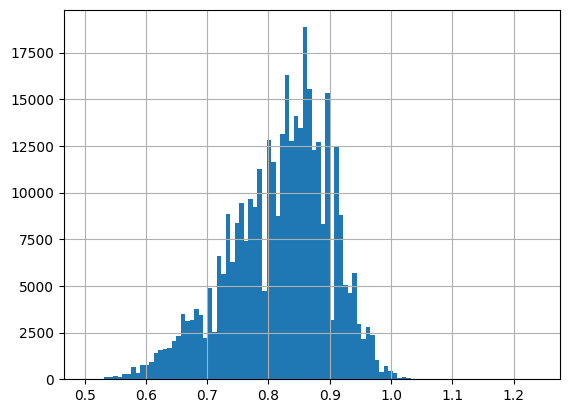

In [23]:
(df["tow"] / df["MTOW"]).hist(bins=100)

In [32]:
df[(df["tow"] / df["MTOW"]) > 1.03].flight_id.values

array([249415582, 250020264, 250030428, 250210254, 250242828, 251401350,
       252593101, 253086784, 253968219, 254886542, 255009398, 256569887,
       257564559, 256267626, 257579742, 249761274, 257123965, 257270731,
       254676967, 254925394, 255198787, 254889763, 249223866, 249453575,
       249044014, 256253559, 256500632, 257132947, 257644354, 249012236,
       249087461, 249359448, 249595670, 250486323, 250470528, 250633561,
       250806675, 249900202, 250803601, 250833861, 251215615, 251773655,
       251788228, 257606134, 257861616, 249746404, 249810526, 249988920,
       256647504, 256756597, 256796886, 257125186, 257251064, 257336505,
       257380942, 257494990, 257516707, 248793831, 255578568, 249734617,
       249748175, 249900837, 250079825, 253972052, 248981315, 249649454,
       256800040, 254286130, 255473710, 256328774, 249685841, 252571156,
       252993039, 256374063, 256616550, 256897998, 249730980, 249211733,
       249231270, 249614081, 249623674, 249691008, 

In [33]:
df[df["flight_id"] == 255644590]

,flight_id,date,callsign,adep,name_adep,country_code_adep,ades,name_ades,country_code_ades,actual_offblock_time,...,onblock_time,ramp_to_ramp_hours,takeoff_time,air_time_hours,day,day_of_week,week,quarter,is_week_day,route
116390,255644590,2022-09-25,80da5f43b163c5056927f2c4823af984,LOWW,Vienna,AT,LLBG,Tel Aviv,IL,2022-09-25 18:40:00+00:00,...,2022-09-25 21:50:33+00:00,3.175833,2022-09-25 18:48:00+00:00,2.9425,25,6,38,3,False,LOWW_LLBG
